In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./dataset/predictive_maintenance.csv')

In [4]:
df.columns = ['udi', 'product_id', 'type', 'air_temperature',
       'process_temperature', 'rotational_speed', 'torque',
       'tool_wear', 'target', 'failure_type']

In [5]:
df.head(5)

,udi,product_id,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   udi                  10000 non-null  int64  
 1   product_id           10000 non-null  object 
 2   type                 10000 non-null  object 
 3   air_temperature      10000 non-null  float64
 4   process_temperature  10000 non-null  float64
 5   rotational_speed     10000 non-null  int64  
 6   torque               10000 non-null  float64
 7   tool_wear            10000 non-null  int64  
 8   target               10000 non-null  int64  
 9   failure_type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe()

,udi,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


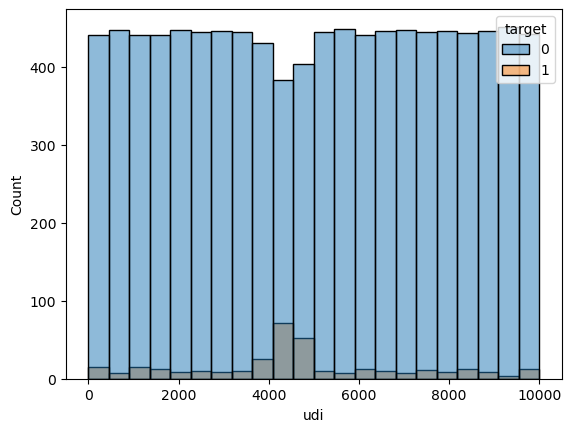

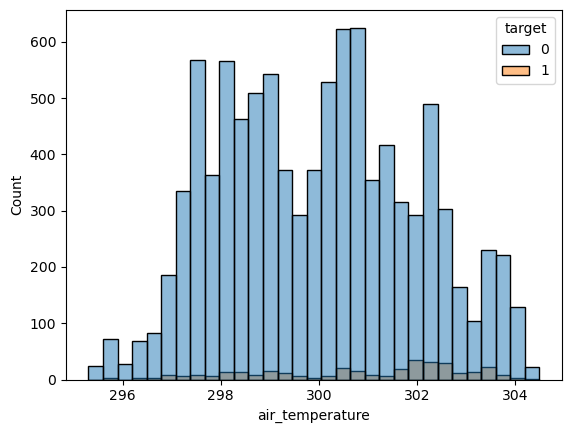

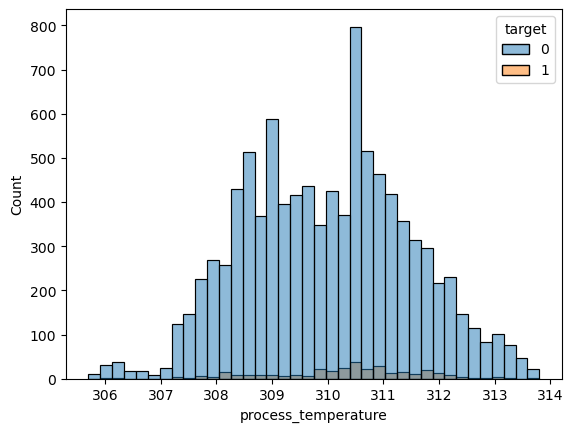

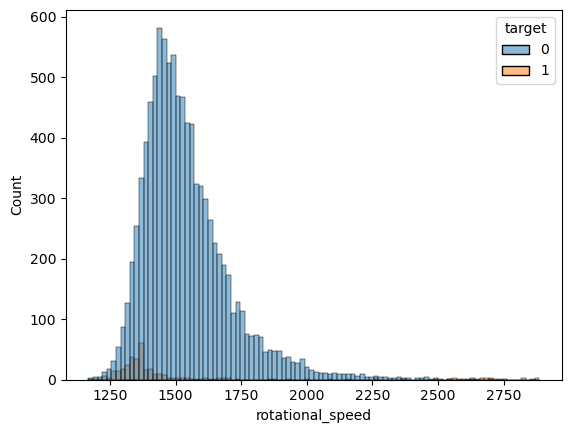

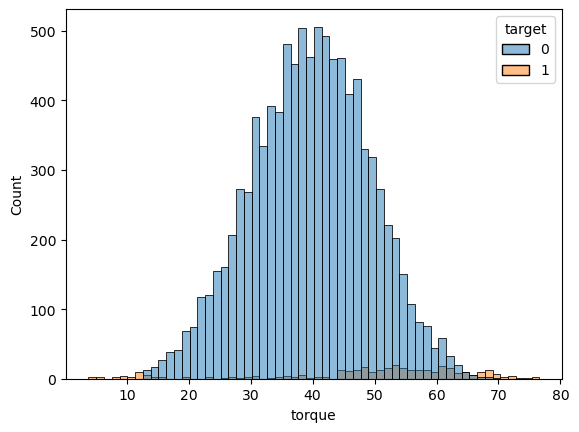

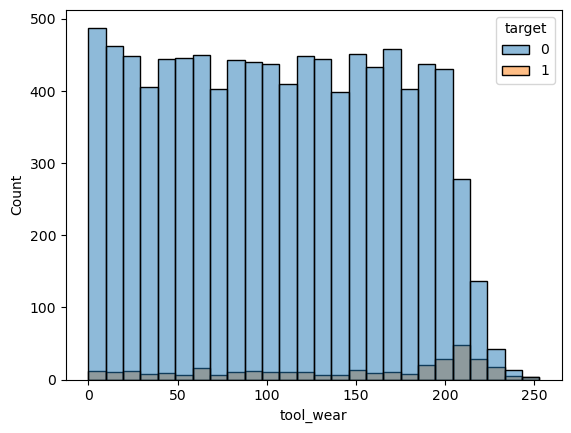

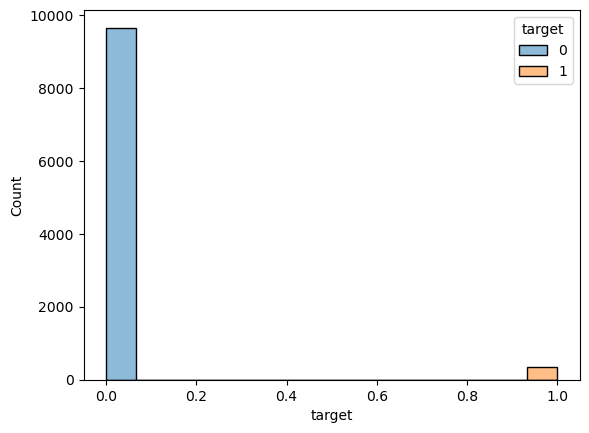

In [8]:
for col in df.select_dtypes(include = np.number):
    sns.histplot(df, x = col, hue = 'target')
    plt.show()

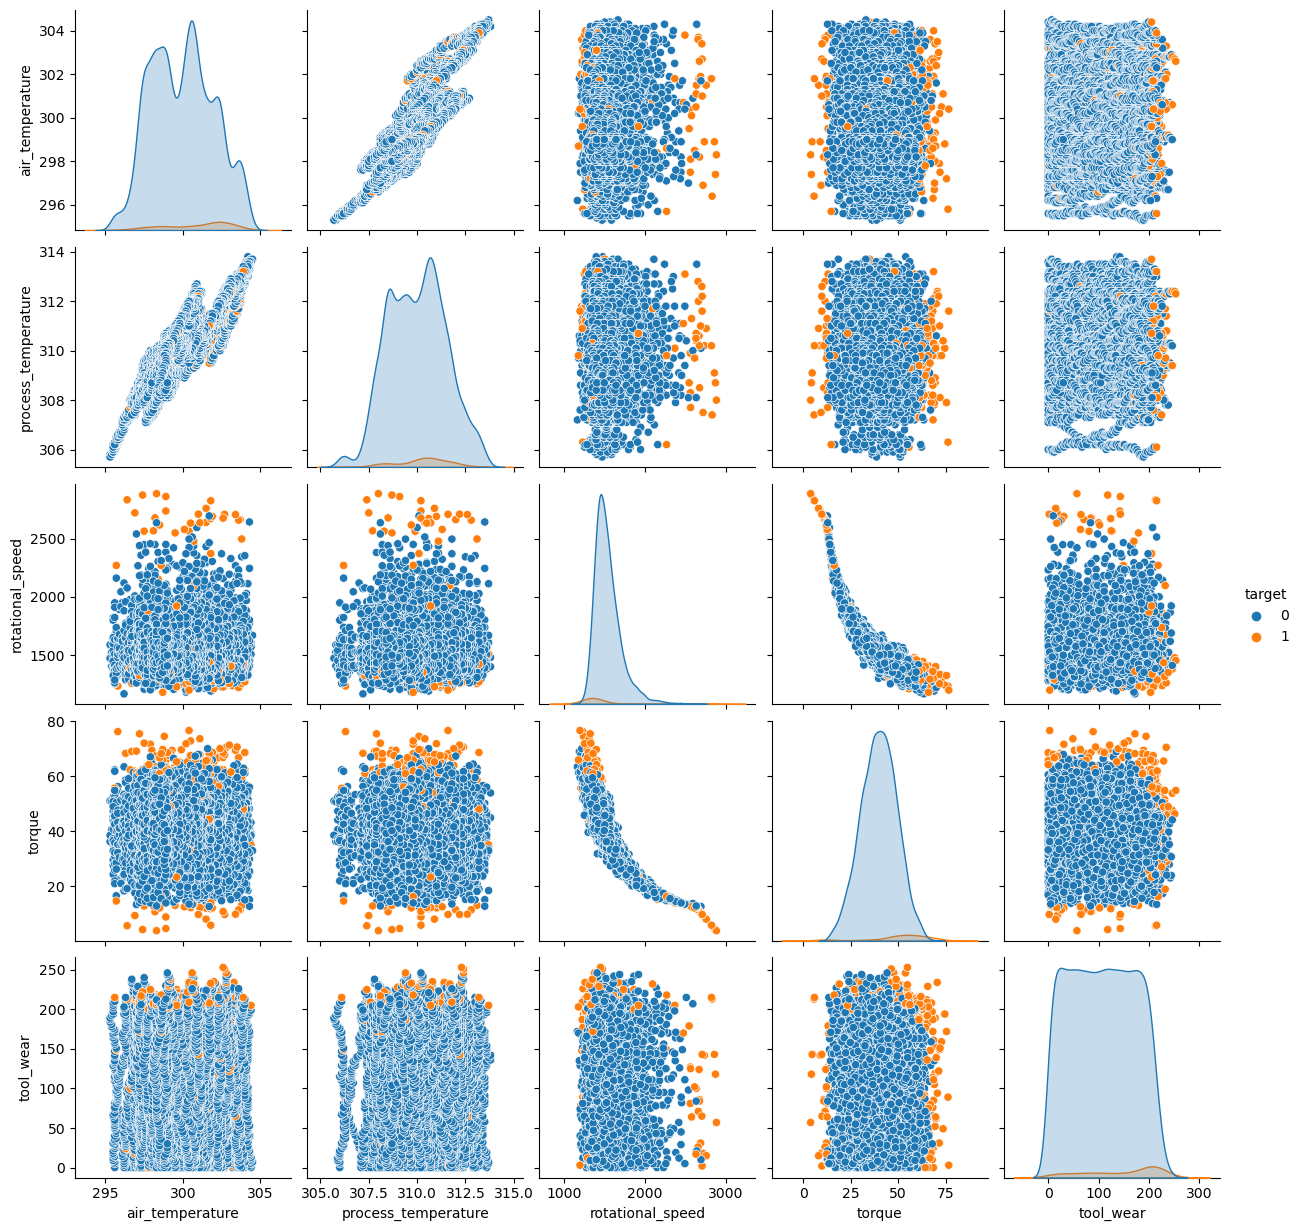

In [9]:
sns.pairplot(df.drop(columns = 'udi'), hue = 'target')

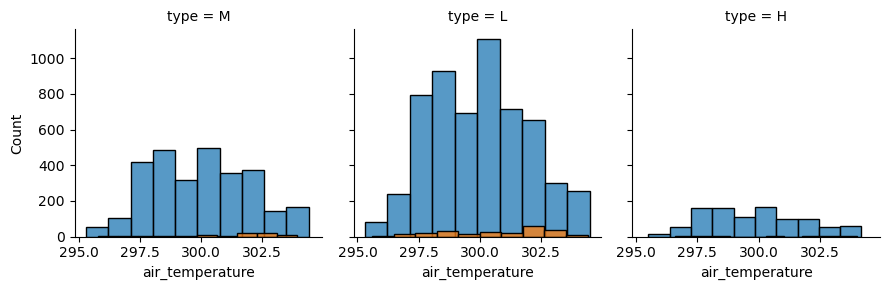

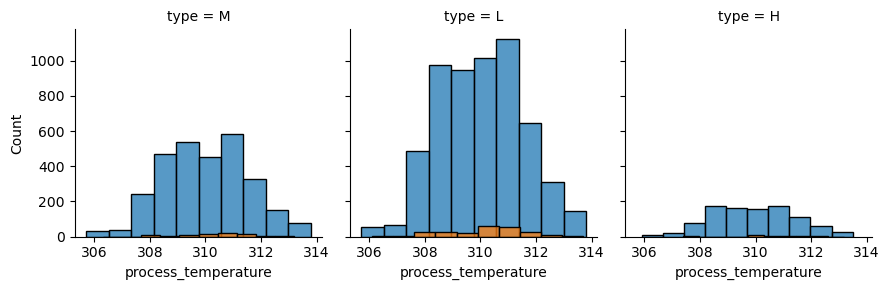

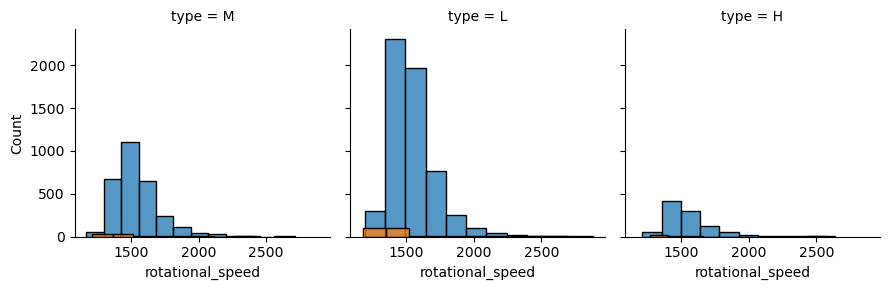

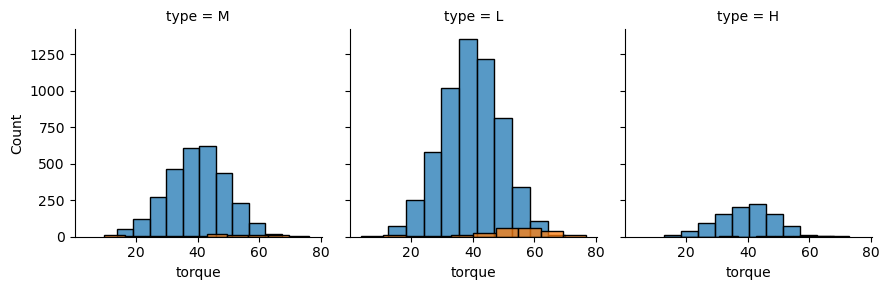

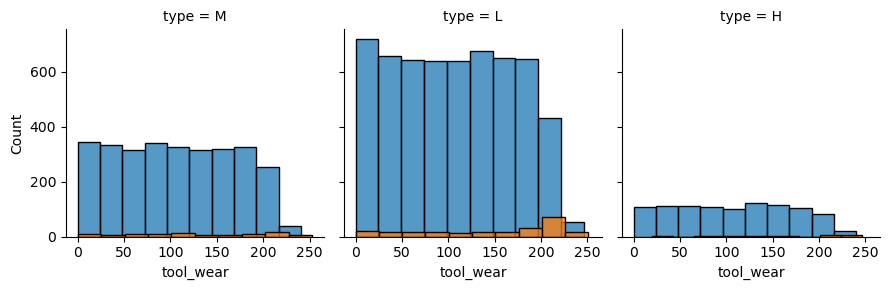

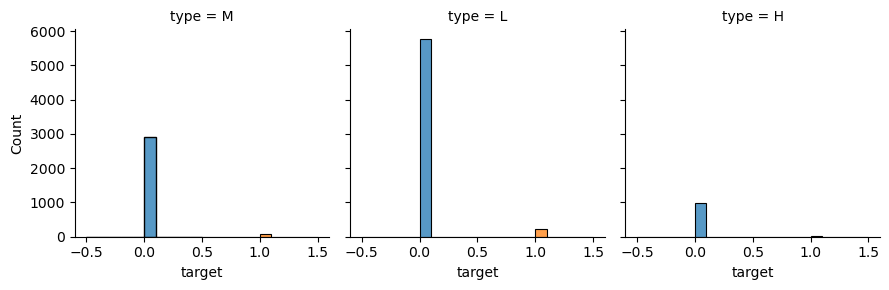

In [10]:
for col in df.drop(columns='udi').select_dtypes(include = np.number):
    g = sns.FacetGrid(df, col="type", hue = 'target')
    g.map(sns.histplot, col, bins = 10)
    plt.show()

## Machine learning

In [11]:
import numpy as np
df2 = df.select_dtypes(include = np.number).drop(columns = 'udi')

X = df2.drop(columns = 'target')
y = df2.target


In [20]:
X

,air_temperature,process_temperature,rotational_speed,torque,tool_wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [12]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 31)

logit.fit(X_train, y_train)

LogisticRegression()

In [13]:
logit.intercept_

array([-0.0071798])

In [14]:
logit.coef_

array([[ 0.91495093, -0.99579688,  0.01096658,  0.2746394 ,  0.01368724]])

In [15]:
X_test

,air_temperature,process_temperature,rotational_speed,torque,tool_wear
757,296.9,308.1,1555,33.7,229
1003,296.2,307.1,1444,46.7,194
8089,300.1,311.3,1676,30.3,151
2967,300.6,309.4,1369,51.6,71
5011,303.7,312.8,1634,33.8,63
...,...,...,...,...,...
5442,303.1,312.7,1353,51.8,97
1114,296.4,307.3,1540,37.4,75
1227,297.1,308.4,1422,42.1,148
7764,300.4,311.7,1555,38.7,5


In [16]:
# % de falhas detectadas no dataset de teste
y_test.sum() / len(y_test)

0.03

In [17]:
# % de falhas detectadas na predição
logit.predict(X_test).sum() / len(X_test)

0.01

In [18]:
y_pred = logit.predict(X_test)

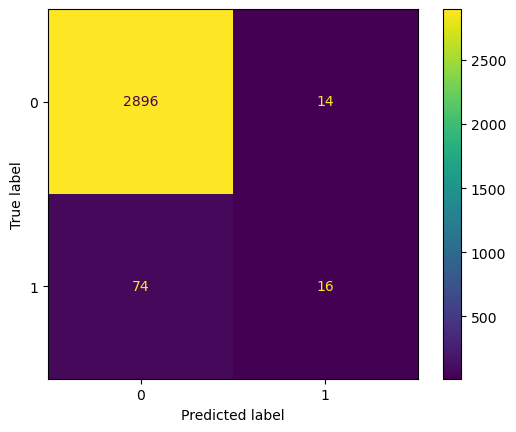

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="viridis");

0.024666666666666667